# Data Mining Project 2020-2021

# Introduction 


## 1.1 Importing libraries

In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import math
from math import ceil

## 1.2 Important Functions

In [214]:
def corrheatmap(dataframe):
    sns.set(style="white")

    # Compute the correlation matrix
    corr = dataframe.corr() #Getting correlation of numerical variables

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool) #Return an array of zeros (Falses) with the same shape and type as a given array
    mask[np.triu_indices_from(mask)] = True #The upper-triangle array is now composed by True values

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 8))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True) #Make a diverging palette between two HUSL colors. Return a matplotlib colormap object.

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, annot=True, linewidths=.5, ax=ax)

    # Layout
    plt.subplots_adjust(top=0.95)
    plt.suptitle("Correlation matrix", fontsize=25)
    plt.yticks(rotation=0)
    # Fixing the bug of partially cut-off bottom and top cells
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values

    plt.show()

## 1.3 Importing and Assessing Data

In [215]:
df = pd.DataFrame(pd.read_csv('donors.csv'))

In [216]:
df.head()

,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,...,7.741935,95515,0,L,4,E,X,X,X,C
1,1,2014-01-01,BOA,1,CA,91326,,,1972-02-01,0,...,15.666667,148535,0,L,2,G,X,X,X,A
2,2,2010-01-01,AMH,1,NC,27017,,,NaN,0,...,7.481481,15078,1,L,4,E,X,X,X,C
3,3,2007-01-01,BRY,0,CA,95953,,,1948-01-01,0,...,6.812500,172556,1,L,4,E,X,X,X,C
4,4,2006-01-01,,0,FL,33176,,,1940-01-01,0,...,6.864865,7112,1,L,2,F,X,X,X,A


In [217]:
#Dimension of the Dataset
df.shape

(95412, 476)

In [218]:
#Data types of the variables
df.dtypes

Unnamed: 0     int64
ODATEDW       object
OSOURCE       object
TCODE          int64
STATE         object
               ...  
RFA_2A        object
MDMAUD_R      object
MDMAUD_F      object
MDMAUD_A      object
GEOCODE2      object
Length: 476, dtype: object

# First group of columns (Donor's Characteristics)

In [219]:
DonorCharactdf = df[['CONTROLN','TCODE','DOB','GENDER','NUMCHLD','INCOME','STATE','ZIP','MDMAUD']]
DonorCharactdf.set_index('CONTROLN', inplace=True)
DonorCharactdf

,TCODE,DOB,GENDER,NUMCHLD,INCOME,STATE,ZIP,MDMAUD
CONTROLN,,,,,,,,
95515,0,1957-12-01,F,NaN,NaN,IL,61081,XXXX
148535,1,1972-02-01,M,1.0,6.0,CA,91326,XXXX
15078,1,NaN,M,NaN,3.0,NC,27017,XXXX
172556,0,1948-01-01,F,NaN,1.0,CA,95953,XXXX
7112,0,1940-01-01,F,1.0,3.0,FL,33176,XXXX
...,...,...,...,...,...,...,...,...
184568,1,NaN,M,NaN,NaN,AK,99504,XXXX
122706,1,1970-01-01,M,1.0,7.0,TX,77379,XXXX
189641,1,1958-01-01,M,NaN,NaN,MI,48910,XXXX


In [220]:
DonorCharactdf.TCODE = DonorCharactdf.TCODE.astype('category')
DonorCharactdf.GENDER = DonorCharactdf.GENDER.astype('category')
DonorCharactdf.STATE = DonorCharactdf.STATE.astype('category')
DonorCharactdf.MDMAUD = DonorCharactdf.MDMAUD.astype('category')
DonorCharactdf.INCOME = DonorCharactdf.INCOME.astype('category')

In [221]:
DonorCharactdf.dtypes

TCODE      category
DOB          object
GENDER     category
NUMCHLD     float64
INCOME     category
STATE      category
ZIP          object
MDMAUD     category
dtype: object

In [222]:
#check null values
DonorCharactdf.isnull().sum()

TCODE          0
DOB        23883
GENDER         0
NUMCHLD    83026
INCOME     21286
STATE          0
ZIP            0
MDMAUD         0
dtype: int64

In [223]:
DonorCharactdf.iloc[:,1:].describe(include='all')

,DOB,GENDER,NUMCHLD,INCOME,STATE,ZIP,MDMAUD
count,71529,95412,12386.000000,74126.0,95412,95412,95412
unique,847,7,NaN,7.0,57,19938,28
top,1968-01-01,F,NaN,5.0,CA,85351,XXXX
freq,1479,51277,NaN,15451.0,17343,61,95118
mean,NaN,NaN,1.527773,NaN,NaN,NaN,NaN
std,NaN,NaN,0.806861,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.000000,NaN,NaN,NaN,NaN


In [224]:
#More info about df
DonorCharactdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95412 entries, 95515 to 185114
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   TCODE    95412 non-null  category
 1   DOB      71529 non-null  object  
 2   GENDER   95412 non-null  category
 3   NUMCHLD  12386 non-null  float64 
 4   INCOME   74126 non-null  category
 5   STATE    95412 non-null  category
 6   ZIP      95412 non-null  object  
 7   MDMAUD   95412 non-null  category
dtypes: category(5), float64(1), object(2)
memory usage: 3.4+ MB


## Getting the Age of every donor

In [225]:
#converting the DOB column to datetime type
parsed_dates = pd.to_datetime(DonorCharactdf.DOB, format='%Y-%m-%d' , errors='coerce') #errors='coerce' meant to return NaN in case of exception
DonorCharactdf['DOB'] = parsed_dates

In [226]:
#Getting the age of every donor today
DonorCharactdf['Age'] = ((pd.datetime.today() - DonorCharactdf['DOB']).dt.days/365).floordiv(other=1).astype('int',errors='ignore')

<AxesSubplot:>

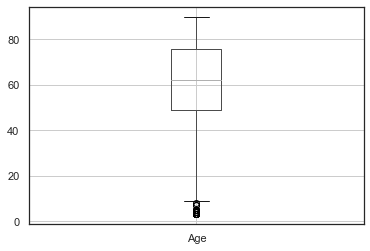

In [227]:
#here we can see that we have outliers 
DonorCharactdf.boxplot(['Age'])

In [228]:
#drop de DOB column
DonorCharactdf.drop('DOB',inplace=True,axis = 1)

### Removing Age outliers

In [229]:
# Compute the IQR
# CODE HERE
q1= DonorCharactdf.quantile(0.25).Age
q3= DonorCharactdf.quantile(0.75).Age
Iqr = q3 - q1

# Compute upper and lower limit (lower_limit = Q1 -1.5*IQR | upper_limit = Q3 + 1.5*IQR)
lower_lim = q1 - 1.5*Iqr
upper_lim = q3 + 1.5*Iqr

initial_len = DonorCharactdf.shape[0]

DonorCharactdf = DonorCharactdf[~(DonorCharactdf['Age'] < lower_lim) | (DonorCharactdf['Age'] > upper_lim)]

len_afterremov = DonorCharactdf.shape[0]

print('Percentage of data kept after removing outliers:', np.round(len_afterremov / initial_len, 4))

Percentage of data kept after removing outliers: 0.9998


## NUMCHILD

In [230]:
print(DonorCharactdf.isnull().sum())
#too many null values for Number of Childrens so we will drop that column
DonorCharactdf.drop('NUMCHLD',inplace=True,axis = 1)

TCODE          0
GENDER         0
NUMCHLD    83006
INCOME     21283
STATE          0
ZIP            0
MDMAUD         0
Age        23883
dtype: int64


## GENDER

In [231]:
#checking all the values for the Gender
#M = Male
#F = Female
#U = Unknown
#J = Joint Account
print(DonorCharactdf['GENDER'].unique())

#replacing unknown values to 'U'
DonorCharactdf['GENDER'].replace(' ','U',inplace=True)
DonorCharactdf['GENDER'].replace('A','U',inplace=True)
DonorCharactdf['GENDER'].replace('C','U',inplace=True)

#checking the difference
print(DonorCharactdf['GENDER'].unique())

['F', 'M', ' ', 'C', 'U', 'J', 'A']
Categories (7, object): ['F', 'M', ' ', 'C', 'U', 'J', 'A']
['F', 'M', 'U', 'J']
Categories (4, object): ['F', 'M', 'U', 'J']


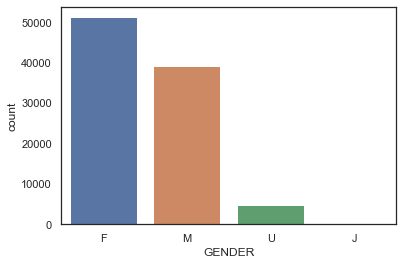

In [232]:
sns.countplot(x=DonorCharactdf['GENDER'],order = DonorCharactdf['GENDER'].value_counts().index)
plt.show()

## INCOME

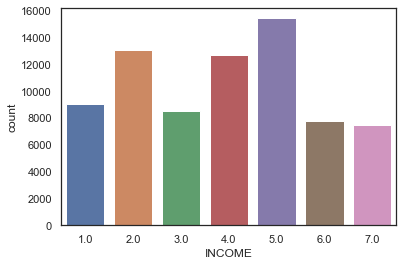

In [233]:
#get a distribution of the income
sns.countplot(x = DonorCharactdf['INCOME'])
plt.show()

## STATE

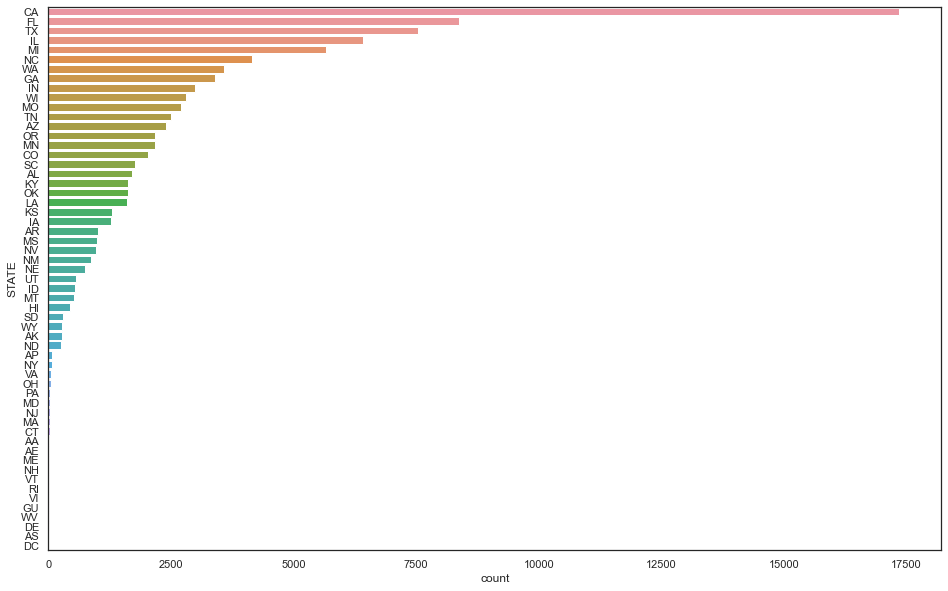

In [234]:
plt.figure(figsize=(16,10))
sns.countplot(y = DonorCharactdf.STATE , order = DonorCharactdf.STATE.value_counts().index)
plt.show()

## MDMAUD - Major Donor Matrix

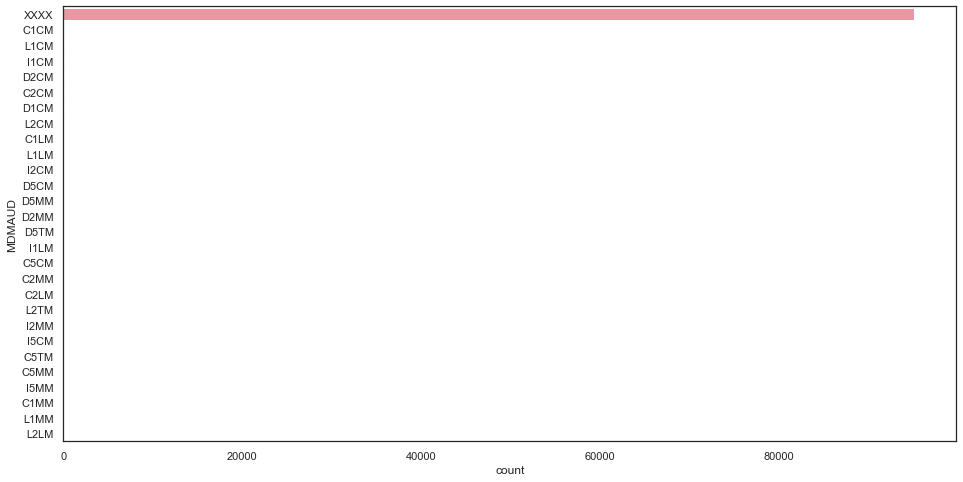

In [235]:
plt.figure(figsize=(16,8))
sns.countplot(y = DonorCharactdf.MDMAUD , order = DonorCharactdf.MDMAUD.value_counts().index)
plt.show()

# Donor's Interests

In [236]:
#Dataframe containing every donor's interests
InterestsDf = df.loc[:, 'COLLECT1':'PLATES']
InterestsDf.set_index(df['CONTROLN'], inplace=True)
#Replace the values for booleans
InterestsDf = InterestsDf.replace(' ',0)
InterestsDf = InterestsDf.replace('Y',1)
InterestsDf  = InterestsDf.astype(bool)
InterestsDf

,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES
CONTROLN,,,,,,,,,,,,,,,,,,
95515,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
148535,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
172556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7112,False,False,True,True,False,False,False,True,False,False,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184568,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
122706,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
189641,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


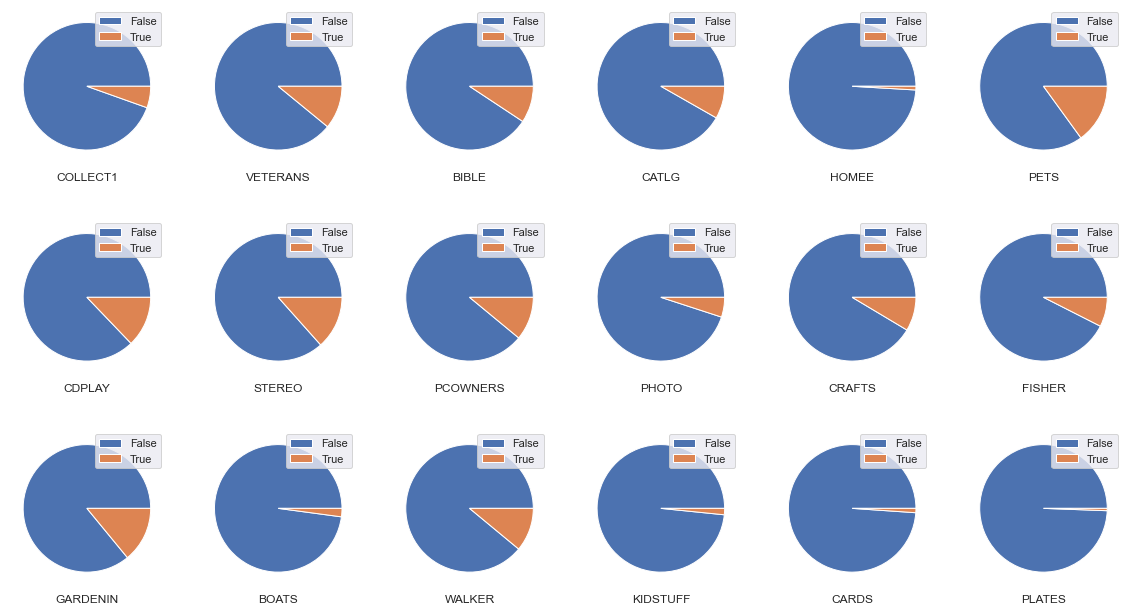

In [237]:
plotdf = InterestsDf.apply(pd.value_counts)

#plot pie charts for all the interests

sns.set()

fig, axes = plt.subplots(3, ceil(len(plotdf.columns.to_list()) / 3), figsize=(20,11))

for ax, feat in zip(axes.flatten(), plotdf.columns.to_list()):
    ax.pie(plotdf[feat])
    ax.set_title(feat, y=-0.13)
    ax.legend(plotdf.index)

plt.show() 

# Donor's Gifts

In [238]:
GiftsDf = df.loc[:, ['ODATEDW','RAMNTALL','NGIFTALL','CARDGIFT','LASTGIFT','LASTDATE','FISTDATE','AVGGIFT']]
GiftsDf.set_index(df['CONTROLN'], inplace=True)
GiftsDf

,ODATEDW,RAMNTALL,NGIFTALL,CARDGIFT,LASTGIFT,LASTDATE,FISTDATE,AVGGIFT
CONTROLN,,,,,,,,
95515,2009-01-01,240.0,31,14,10.0,2015-12-01,2009-11-01,7.741935
148535,2014-01-01,47.0,3,1,25.0,2015-12-01,2013-10-01,15.666667
15078,2010-01-01,202.0,27,14,5.0,2015-12-01,2010-01-01,7.481481
172556,2007-01-01,109.0,16,7,10.0,2015-12-01,2007-02-01,6.812500
7112,2006-01-01,254.0,37,8,15.0,2016-01-01,1999-03-01,6.864865
...,...,...,...,...,...,...,...,...
184568,2016-01-01,25.0,1,0,25.0,2016-02-01,2016-02-01,25.000000
122706,2016-01-01,20.0,1,0,20.0,2016-03-01,2016-03-01,20.000000
189641,2015-01-01,58.0,7,4,10.0,2016-10-01,2014-10-01,8.285714


In [239]:
GiftsDf.isnull().sum()

ODATEDW     0
RAMNTALL    0
NGIFTALL    0
CARDGIFT    0
LASTGIFT    0
LASTDATE    0
FISTDATE    2
AVGGIFT     0
dtype: int64

In [240]:
GiftsDf.ODATEDW = pd.to_datetime(GiftsDf.ODATEDW, format='%Y-%m-%d' , errors='coerce')
GiftsDf.LASTDATE = pd.to_datetime(GiftsDf.LASTDATE, format='%Y-%m-%d' , errors='coerce')
GiftsDf.FISTDATE = pd.to_datetime(GiftsDf.FISTDATE, format='%Y-%m-%d' , errors='coerce')

In [241]:
GiftsDf.dtypes

ODATEDW     datetime64[ns]
RAMNTALL           float64
NGIFTALL             int64
CARDGIFT             int64
LASTGIFT           float64
LASTDATE    datetime64[ns]
FISTDATE    datetime64[ns]
AVGGIFT            float64
dtype: object

In [242]:
metric_GiftsDf = GiftsDf.loc[:,(np.array(GiftsDf.dtypes=="int64")) | (np.array(GiftsDf.dtypes=="float64"))]
metric_GiftsDf

,RAMNTALL,NGIFTALL,CARDGIFT,LASTGIFT,AVGGIFT
CONTROLN,,,,,
95515,240.0,31,14,10.0,7.741935
148535,47.0,3,1,25.0,15.666667
15078,202.0,27,14,5.0,7.481481
172556,109.0,16,7,10.0,6.812500
7112,254.0,37,8,15.0,6.864865
...,...,...,...,...,...
184568,25.0,1,0,25.0,25.000000
122706,20.0,1,0,20.0,20.000000
189641,58.0,7,4,10.0,8.285714


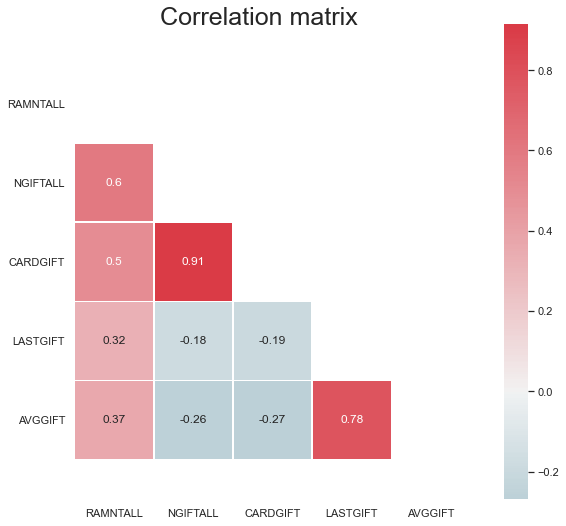

In [264]:
#correlation heatmap
corrheatmap(metric_GiftsDf)

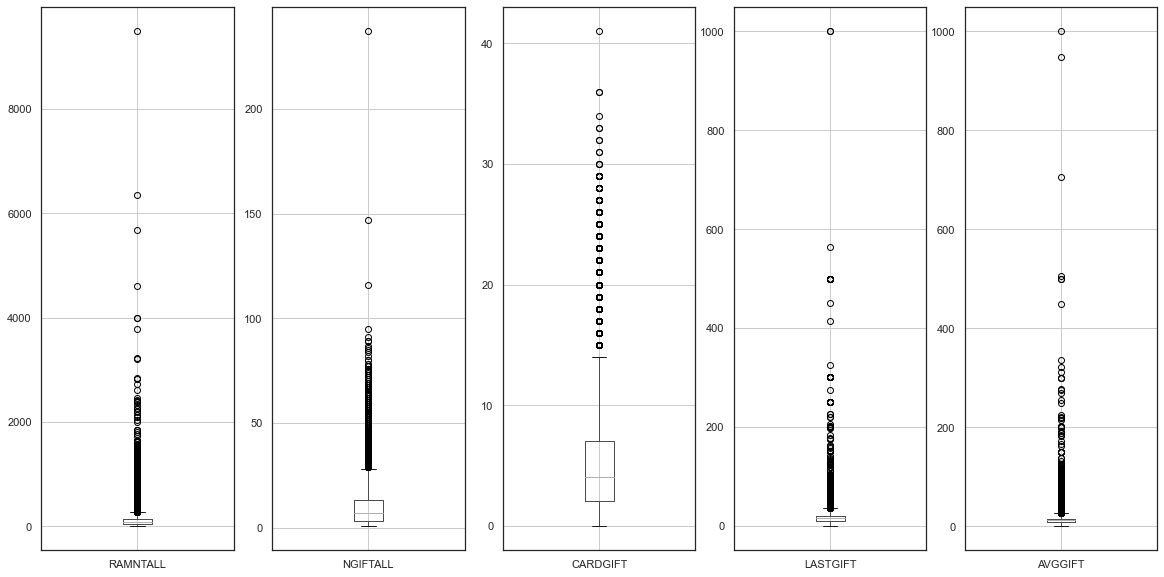

In [244]:
fig, axes = plt.subplots(1,5,figsize=(20,10)) # create figure and axes

for i,el in enumerate(list(metric_GiftsDf.columns.values)):
    metric_GiftsDf.boxplot(el,ax=axes.flatten()[i]) 
    
plt.show()

# Donor's neighborhood

In [245]:
DfNeighborhood = df.loc[:,'POP901':'AC2']
DfNeighborhood.set_index(df['CONTROLN'], inplace=True)

In [246]:
DfNeighborhood.head()

,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,...,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2
CONTROLN,,,,,,,,,,,,,,,,,,,,,
95515,992,264,332,0,35,65,47,53,92,1,...,0,33,65,40,99,99,6,2,10,7
148535,3611,940,998,99,0,0,50,50,67,0,...,0,99,0,99,99,99,20,4,6,5
15078,7001,2040,2669,0,2,98,49,51,96,2,...,15,22,77,17,97,92,9,2,6,5
172556,640,160,219,0,8,92,54,46,61,0,...,16,23,77,22,93,89,16,2,6,6
7112,2520,627,761,99,0,0,46,54,2,98,...,0,99,1,21,99,96,6,2,7,11


In [247]:
DfNeighborhood.dtypes

POP901     int64
POP902     int64
POP903     int64
POP90C1    int64
POP90C2    int64
           ...  
HC21       int64
MHUC1      int64
MHUC2      int64
AC1        int64
AC2        int64
Length: 286, dtype: object

In [248]:
DfNeighborhood.isnull().sum()

POP901     0
POP902     0
POP903     0
POP90C1    0
POP90C2    0
          ..
HC21       0
MHUC1      0
MHUC2      0
AC1        0
AC2        0
Length: 286, dtype: int64

## Population

In [249]:
DfPopulation = DfNeighborhood.loc[:,'POP901':'POP90C5']
DfPopulation

,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5
CONTROLN,,,,,,,,
95515,992,264,332,0,35,65,47,53
148535,3611,940,998,99,0,0,50,50
15078,7001,2040,2669,0,2,98,49,51
172556,640,160,219,0,8,92,54,46
7112,2520,627,761,99,0,0,46,54
...,...,...,...,...,...,...,...,...
184568,27380,7252,10037,99,0,0,50,50
122706,1254,322,361,96,0,4,51,49
189641,552,131,205,99,0,0,53,47


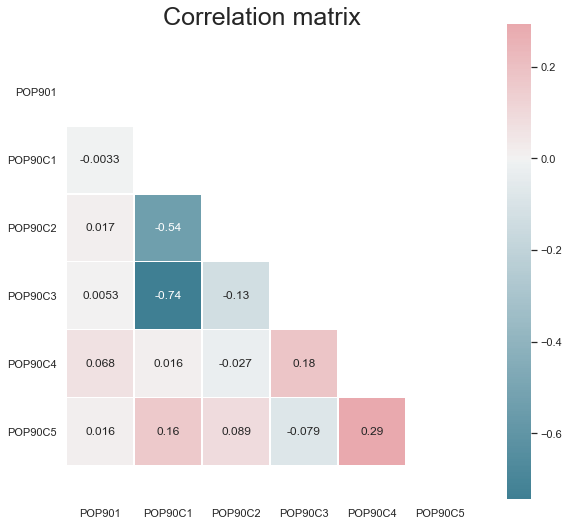

In [265]:
#correlation heatmap
corrheatmap(DfPopulation)

We have to delete the column POP902 and POP903 because it has a correlation too high comparing to POP901 and make the information redudant

In [251]:
DfPopulation.drop(['POP902','POP903'],inplace=True,axis = 1)

## Ethnic group

In [252]:
#to characterize the ethical group in each neighborhood we pick the most general columns
DfEthnic = DfNeighborhood.loc[:,'ETH1':'ETH6']
DfEthnic

,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6
CONTROLN,,,,,,
95515,92,1,0,0,11,0
148535,67,0,0,31,6,4
15078,96,2,0,0,2,0
172556,61,0,0,11,32,6
7112,2,98,0,0,1,0
...,...,...,...,...,...,...
184568,78,10,6,4,5,0
122706,91,3,0,2,6,1
189641,82,14,0,1,9,0


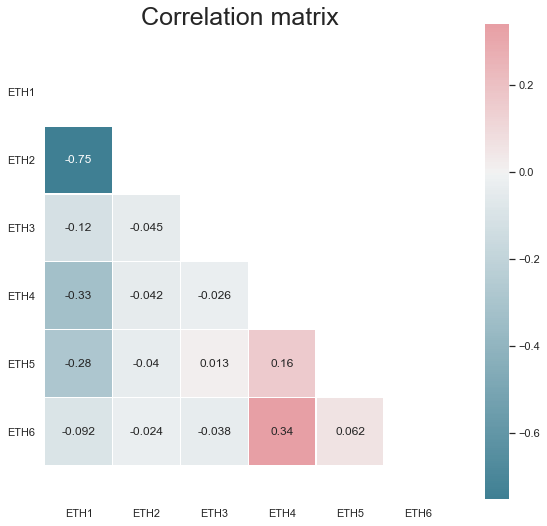

In [253]:
#correlation heatmap
corrheatmap(DfEthnic)

## Population Age

In [254]:
DfAge = DfNeighborhood[['AGE904','AGE907']]
DfAge

,AGE904,AGE907
CONTROLN,,
95515,40,25
148535,32,32
15078,37,23
172556,34,25
7112,36,27
...,...,...
184568,29,30
122706,28,39
189641,30,32


## Marital Status

In [255]:
DfMStatus = DfNeighborhood.loc[:,'MARR1':'MARR4']
DfMStatus

,MARR1,MARR2,MARR3,MARR4
CONTROLN,,,,
95515,61,7,12,19
148535,69,4,3,24
15078,63,9,9,19
172556,63,9,6,23
7112,42,17,9,33
...,...,...,...,...
184568,58,15,3,24
122706,73,4,2,20
189641,45,19,5,31


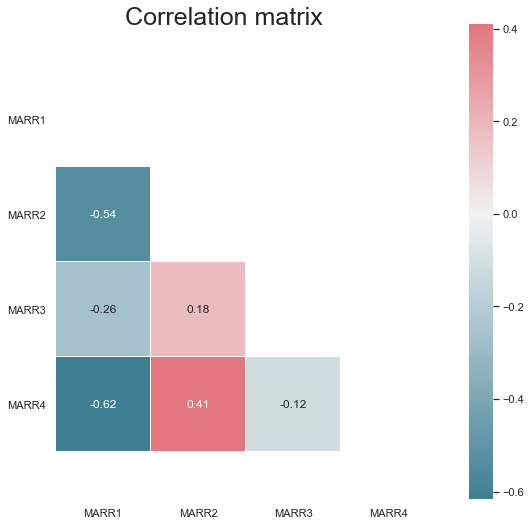

In [256]:
corrheatmap(DfMStatus)

In [257]:
DfHousing = DfNeighborhood.loc[:,'HV2':'HU5']
DfHousing

,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5
CONTROLN,,,,,,,,
95515,635,3,2,86,14,96,4,7
148535,5218,12,10,96,4,97,3,9
15078,546,2,1,78,22,93,7,18
172556,1263,2,1,48,52,93,7,6
7112,594,4,3,90,10,97,3,0
...,...,...,...,...,...,...,...,...
184568,1025,6,6,56,44,89,11,3
122706,1723,3,3,88,12,97,3,0
189641,377,4,3,66,34,95,5,10


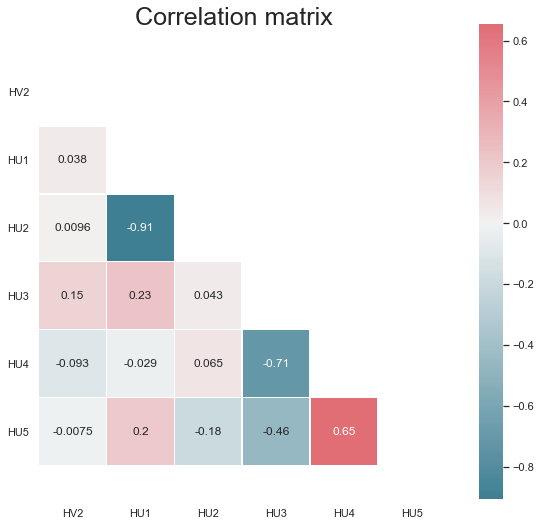

In [266]:
corrheatmap(DfHousing)

In [259]:
DfHousing.drop(['HV3','HV4'],inplace=True,axis = 1)

## Households

In [260]:
DfHH = DfNeighborhood.loc[:,'HHD1':'HHD12']
DfHH

,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12
CONTROLN,,,,,,,,,,,,
95515,38,80,70,32,84,16,6,2,5,9,15,3
148535,59,94,88,55,95,5,4,1,3,5,4,2
15078,36,76,65,30,86,14,7,2,5,11,17,3
172556,36,73,61,30,84,16,6,3,3,21,12,4
7112,42,82,49,22,92,8,20,3,17,9,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...
184568,44,72,56,32,83,17,12,3,10,16,15,8
122706,63,89,85,60,96,4,2,1,1,7,5,1
189641,37,64,43,21,80,20,16,2,14,21,20,9


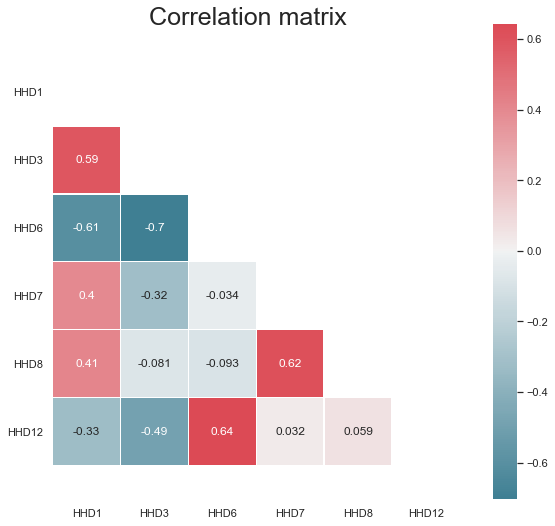

In [267]:
corrheatmap(DfHH)

In [262]:
DfHH.drop(['HHD2','HHD4','HHD5','HHD9','HHD10','HHD11'],inplace=True,axis = 1)

## Codes and Incomes

In [275]:
DfCodesIncomes = DfNeighborhood.loc[:,['MSA','ADI','DMA','IC4','IC5']]
DfCodesIncomes

,MSA,ADI,DMA,IC4,IC5
CONTROLN,,,,,
95515,0.0,177.0,682.0,378,12883
148535,4480.0,13.0,803.0,1037,36175
15078,0.0,281.0,518.0,340,11576
172556,9340.0,67.0,862.0,423,15130
7112,5000.0,127.0,528.0,321,9836
...,...,...,...,...,...
184568,380.0,0.0,743.0,535,18807
122706,3360.0,201.0,618.0,849,26538
189641,4040.0,61.0,551.0,345,12178


In [276]:
DfCodesIncomes.MSA = DfCodesIncomes.MSA.astype('category')
DfCodesIncomes.ADI = DfCodesIncomes.ADI.astype('category')
DfCodesIncomes.DMA = DfCodesIncomes.DMA.astype('category')

In [277]:
DfCodesIncomes.dtypes

MSA    category
ADI    category
DMA    category
IC4       int64
IC5       int64
dtype: object

## Social Assistance

In [280]:
DfSocialAss = DfNeighborhood.loc[:,'HHAS1':'HHAS4']
DfSocialAss

,HHAS1,HHAS2,HHAS3,HHAS4
CONTROLN,,,,
95515,28,4,51,1
148535,6,2,66,3
15078,28,8,31,11
172556,22,14,26,20
7112,35,8,11,14
...,...,...,...,...
184568,9,6,70,6
122706,8,5,61,7
189641,10,13,26,26


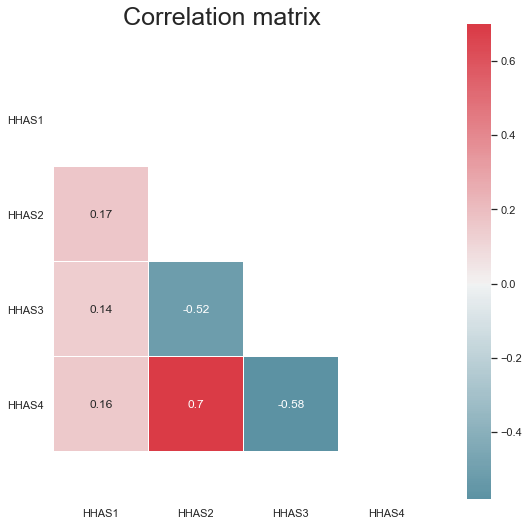

In [281]:
corrheatmap(DfSocialAss)

## Movimentation

In [285]:
DfMov = DfNeighborhood.loc[:,['TPE1','TPE2','TPE3','TPE7','TPE8','TPE9','TPE11','PEC1']]
DfMov

,TPE1,TPE2,TPE3,TPE7,TPE8,TPE9,TPE11,PEC1
CONTROLN,,,,,,,,
95515,88,8,0,0,0,4,16,1
148535,80,14,0,0,0,6,32,0
15078,74,22,0,0,2,2,24,1
172556,58,36,0,0,6,0,15,0
7112,73,22,1,0,3,1,27,2
...,...,...,...,...,...,...,...,...
184568,76,15,2,0,5,2,20,1
122706,80,4,4,0,6,5,32,3
189641,83,17,0,0,0,0,17,0


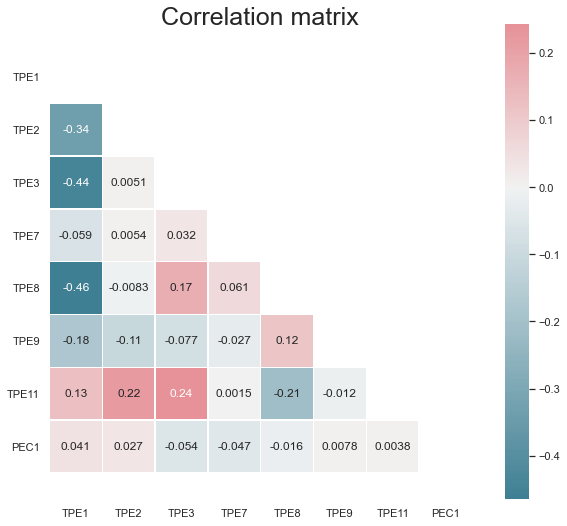

In [286]:
corrheatmap(DfMov)

## Job Areas

In [288]:
DfJobs = DfNeighborhood.loc[:,'OCC1':'OCC13']
DfJobs

,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13
CONTROLN,,,,,,,,,,,,,
95515,9,3,8,13,9,0,3,9,3,15,19,5,4
148535,22,24,4,21,13,2,1,6,0,4,1,0,3
15078,10,5,2,6,12,0,1,9,5,18,20,5,7
172556,17,3,0,6,6,0,0,13,42,12,0,0,0
7112,17,8,2,6,15,3,7,22,2,9,0,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
184568,15,16,5,10,21,0,3,11,1,11,2,3,3
122706,18,31,0,13,17,0,1,2,4,6,0,3,5
189641,5,13,9,5,22,0,2,14,0,13,9,5,2


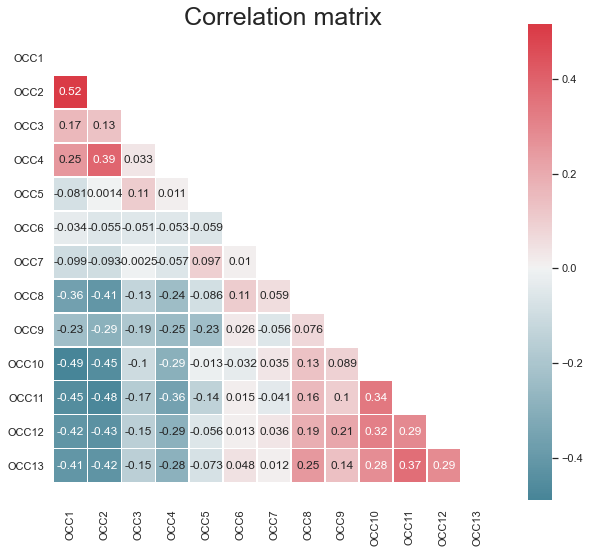

In [289]:
corrheatmap(DfJobs)